In [1]:
import evaluation 
import importlib
importlib.reload(evaluation)

<module 'evaluation' from '/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py'>

In [2]:
from shallow_models.shallow_ensembles import RegressionEnsemble as ShallowEnsemble
import shallow_models
importlib.reload(shallow_models)

<module 'shallow_models' from '/Users/thomas/Documents/Master-Thesis/new_version/shallow_models/__init__.py'>

In [3]:
import ensembles
import networks
importlib.reload(networks)
import dataset_creation
import tensorflow as tf
import base
import numpy as np
#from shallow_models.shallow_ensembles import BootstrapEnsemble as ShallowBootstrap

In [4]:
trials = 3

num_neurons = [[10,10,10],[5,10,5],[10,5,10],[50,30,20],[1,1,1]]
seeds = [50,100,150,200,25]
num_layers = len(num_neurons[0])
learning_rates = np.arange(0.01,0.1,0.005)#np.arange(0.1,0.01,0.001)#
#AdamWOptimizer = tf.contrib.opt.extend_with_decoupled_weight_decay(tf.train.AdamOptimizer)


#tf.contrib.opt.AdamWOptimizer]
#tf.contrib.opt.NadamOptimizer
#learning_rates   = (learning_rates-min(learning_rates))/(max(learning_rates)-min(learning_rates))

activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers,[tf.nn.relu]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
optimizers = [tf.contrib.opt.NadamOptimizer, tf.train.AdamOptimizer, tf.train.MomentumOptimizer]#,AdamWOptimizer]#, tf.contrib.opt.AdamWOptimizer]



param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             #'learning_rate':learning_rates,
              'optimizer':optimizers,
             'seed':seeds,
             'l2':[True,False]
             }


model_num_neurons = [30,50,30,10]
model_params = {
    'seed':50,
    'learning_rate':0.002,
    'num_neurons':model_num_neurons,
    'activations':[tf.nn.leaky_relu]*len(model_num_neurons),
    'optimizer': tf.contrib.opt.NadamOptimizer,
    'initialisation_scheme':tf.keras.initializers.he_normal, #tf.contrib.layers.xavier_initializer#
    #'l':0.05,
    
}
#thompson_model = networks.DropoutNetwork
#thompson_model = ensembles.BootstrapThroughTimeBobStrap
thompson_model=ensembles.BootstrapEnsemble
#thompson_model = ensembles.ForcedDiversityBootstrapThroughTime3

ds = dataset_creation.NonlinearDataset
decay_factor = 1.5

In [5]:
learning_rates

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095])

In [6]:
tg = evaluation.ThompsonGridSearch(param_grid=param_grid, 
                                   dataset_creator=ds, 
                                   thompson_model=thompson_model,
                                   test_model=base.EnsembleNetwork,
                                  model_params=model_params,
                                  decay_factor=decay_factor)

initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>


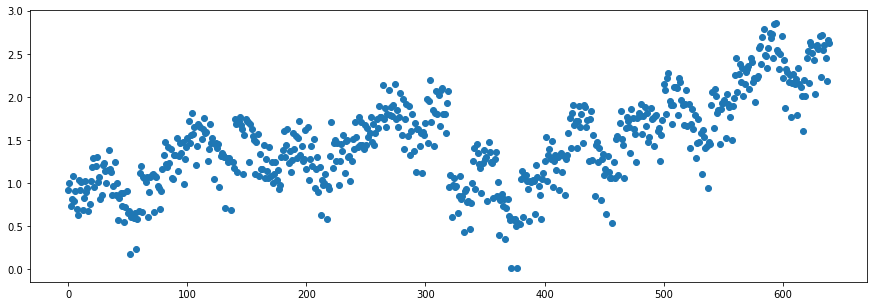

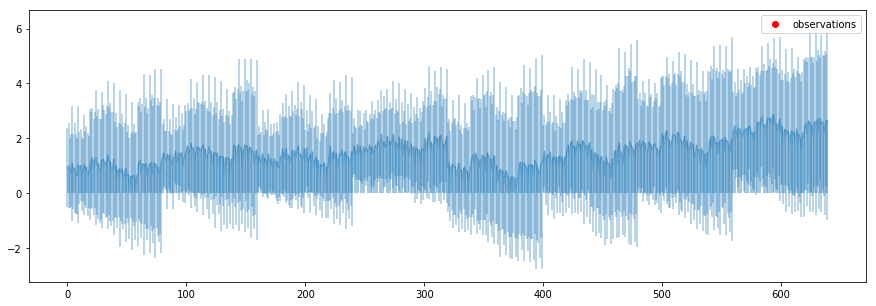

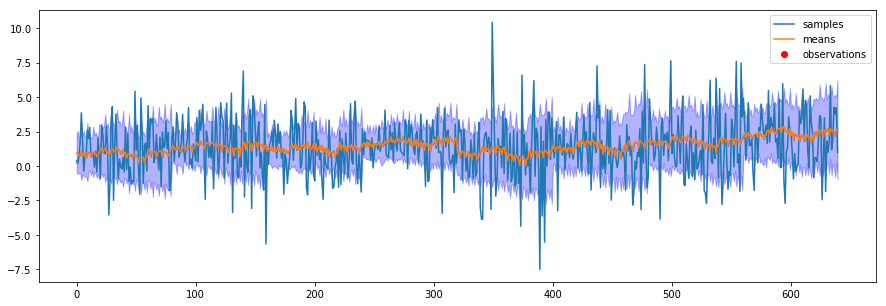

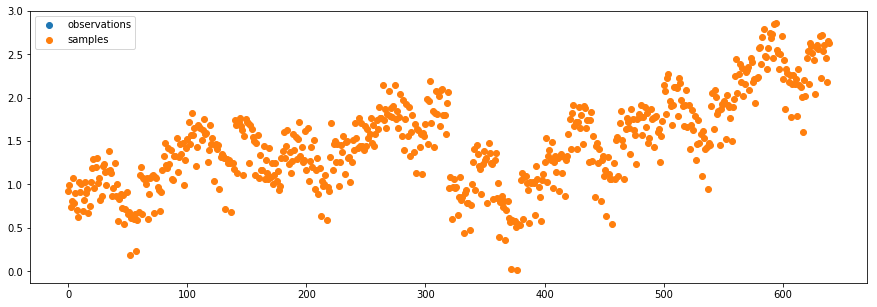

In [7]:
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 1)
new X is in there: True
new y is in there: True
mean probability is 0.5


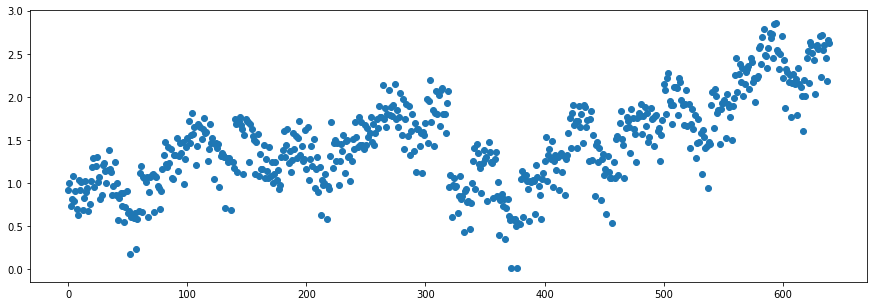

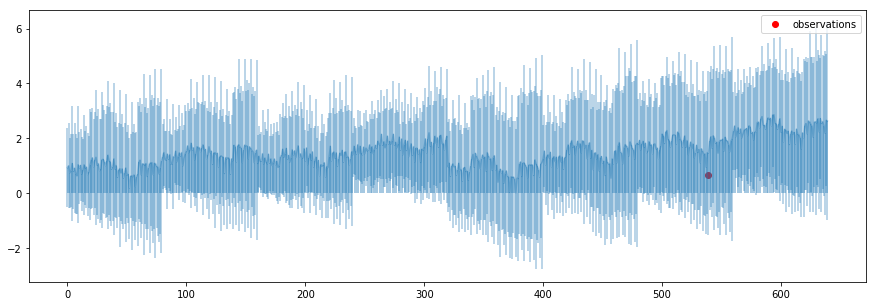

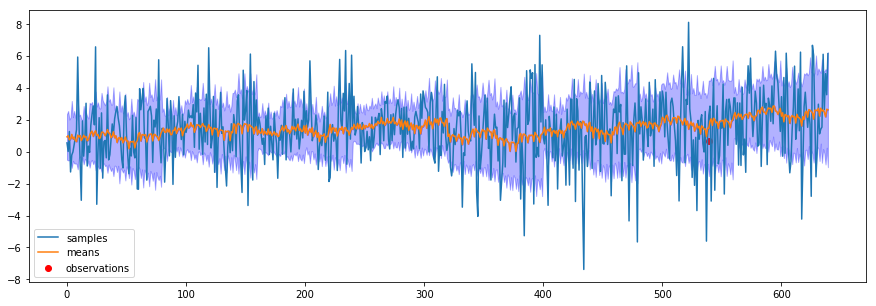

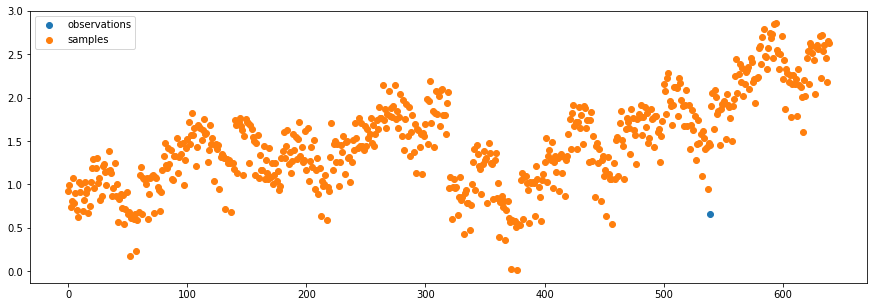

In [8]:
tg.goforit(1)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 2)
new X is in there: True
new y is in there: True
mean probability is 0.6666666666666666
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 2)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 4)
new X is in there: True
new y is in there: True
mean probability is 0.8
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 5)
new X is in there: True
new y is in there: True
mean probability is 0.8333333333333334
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 5)
new X is in there: True
new y is in there: True
mean probability is 0.7142857142857143
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 6)
new X is in there: True
new y is in there: True
mean probability is 0.75


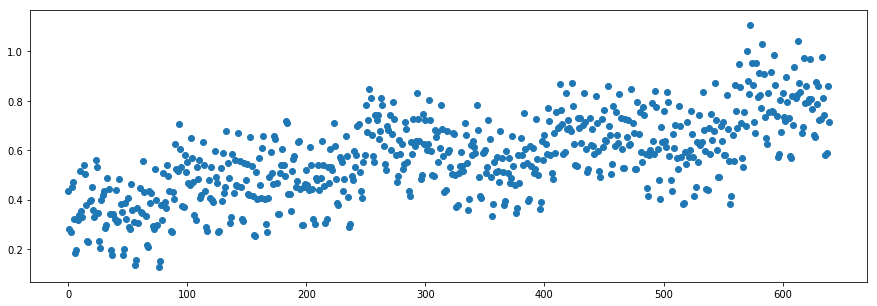

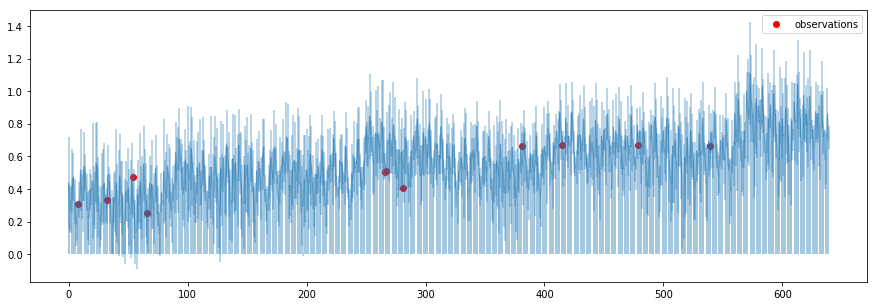

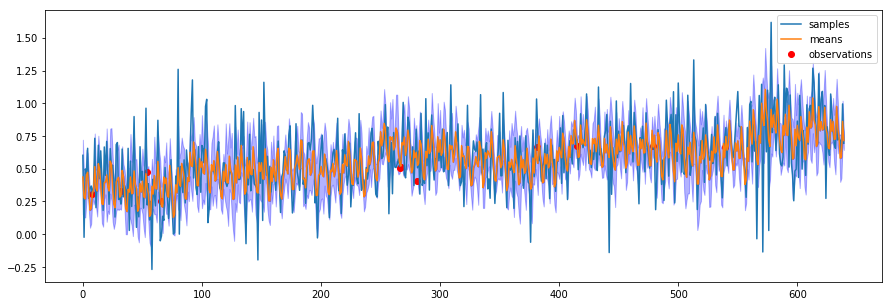

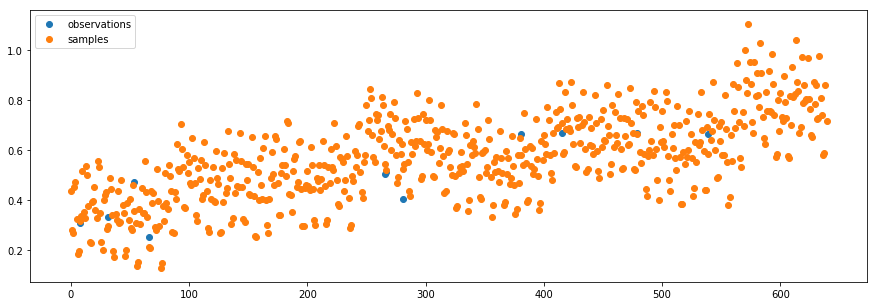

In [9]:
tg.goforit(10)
tg.plot_sample_grid()

In [10]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>],
   'initialisation_scheme': <function tensorflow.python.keras.initializers.he_normal(seed=None)>,
   'l2': False,
   'num_neurons': [10, 5, 10],
   'optimizer': tensorflow.python.training.adam.AdamOptimizer,
   'seed': 100},
  'score': 0.25450667768780094,
  'X': array([[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>],

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 9)
new X is in there: True
new y is in there: True
mean probability is 0.6923076923076923
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 7)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 9)
new X is in there: True
new y is in there: True
mean probability is 0.6
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 6)
new X is in there: True
new y is in there: True
mean probability is 0.375
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 9)
new X is in there: True
new y is in there: True
mean probability is 0.5294117647058824
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 8)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444

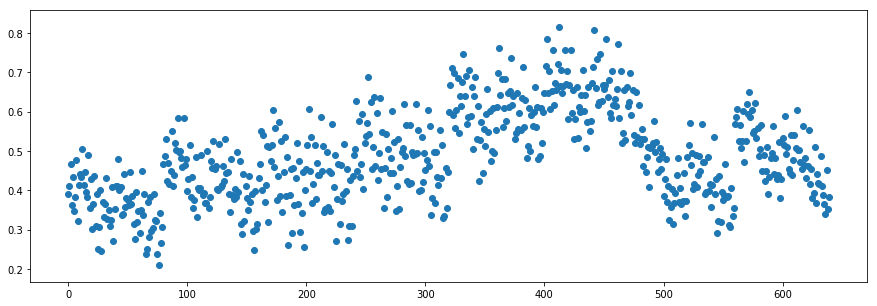

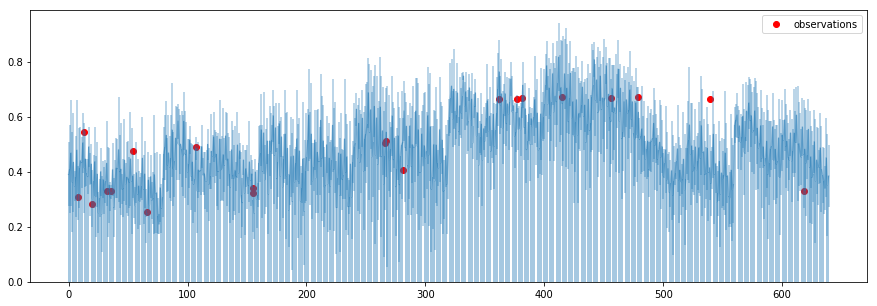

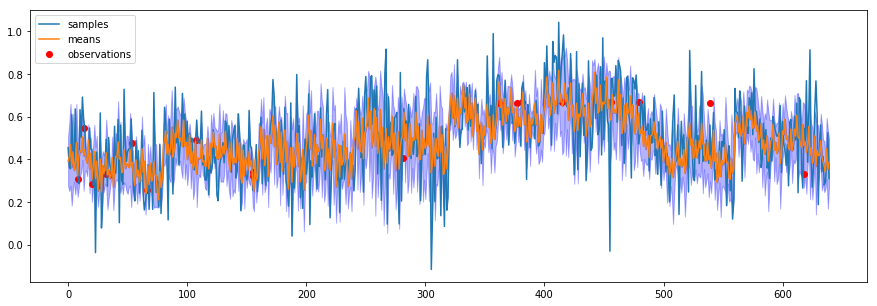

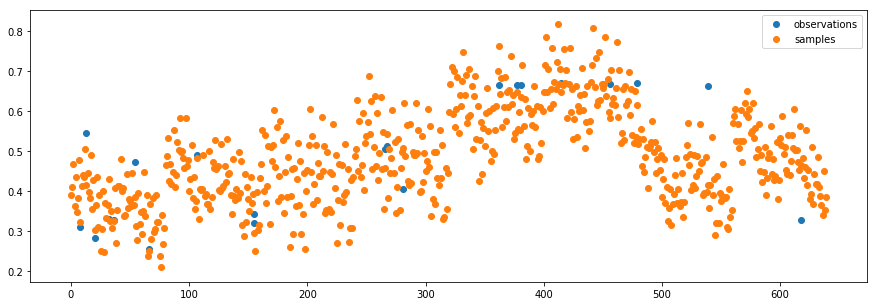

In [11]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 10)
new X is in there: True
new y is in there: True
mean probability is 0.43478260869565216
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 11)
new X is in there: True
new y is in there: True
mean probability is 0.4583333333333333
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 15)
new X is in there: True
new y is in there: True
mean probability is 0.6
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 11)
new X is in there: True
new y is in there: True
mean probability is 0.4230769230769231
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 12)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 9)
new X is in there: True
new y is in there: True
mean

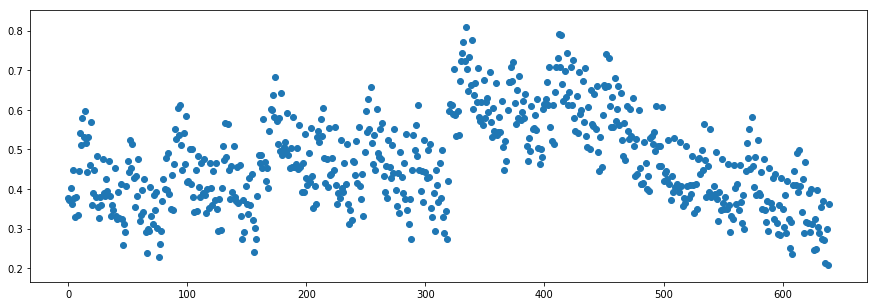

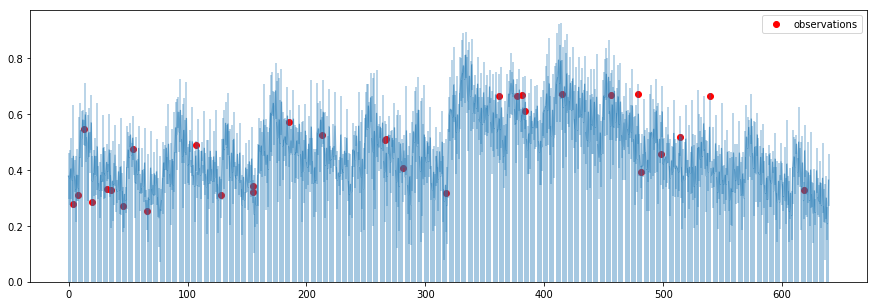

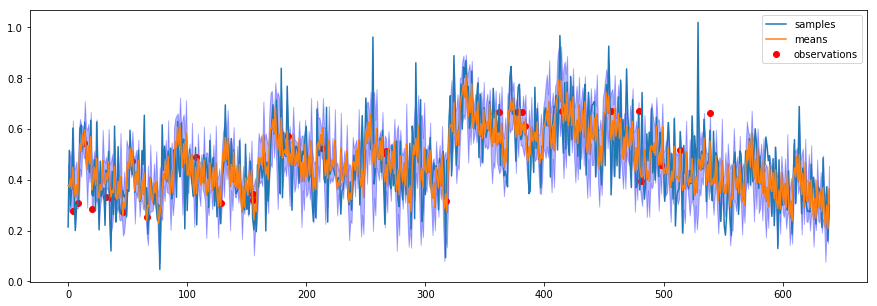

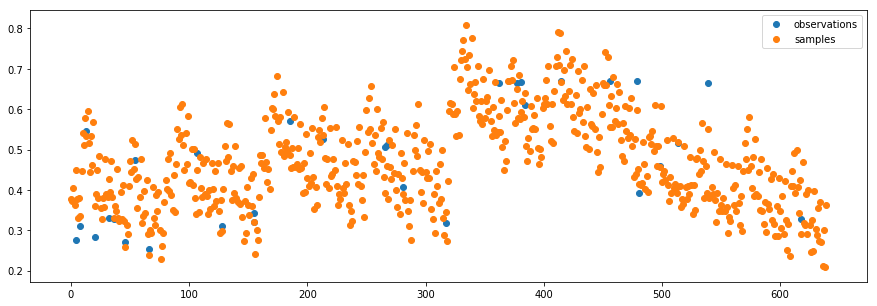

In [12]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 15)
new X is in there: True
new y is in there: True
mean probability is 0.45454545454545453
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 16)
new X is in there: True
new y is in there: True
mean probability is 0.47058823529411764
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 23)
new X is in there: True
new y is in there: True
mean probability is 0.6571428571428571
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 17)
new X is in there: True
new y is in there: True
mean probability is 0.4722222222222222
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 18)
new X is in there: True
new y is in there: True
mean probability is 0.4864864864864865
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 20)
new X is in there: True
new y is in

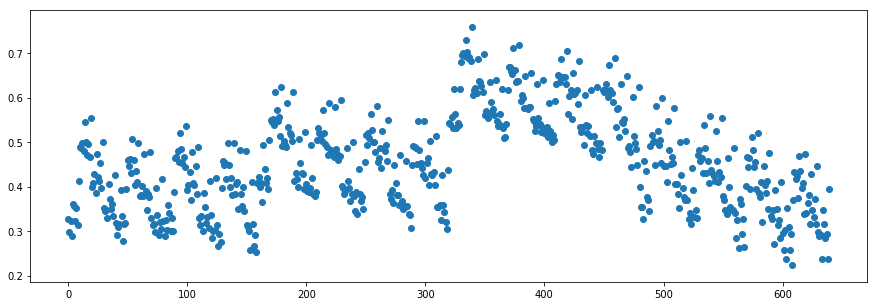

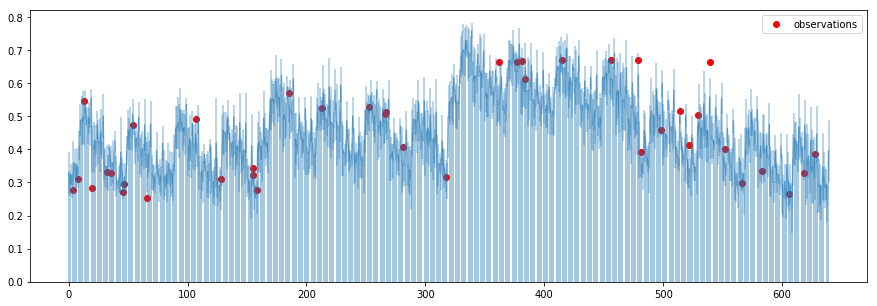

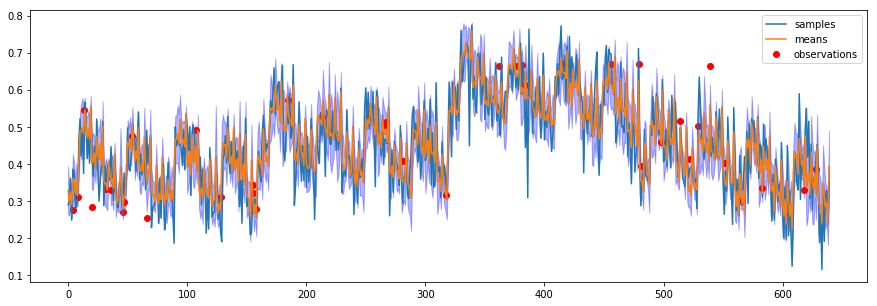

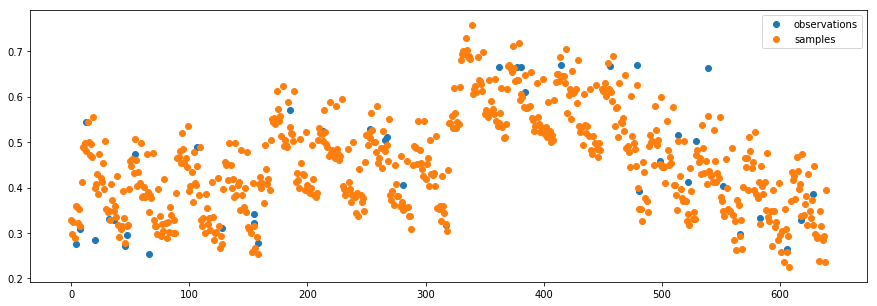

In [13]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 23)
new X is in there: True
new y is in there: True
mean probability is 0.5348837209302325
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 22)
new X is in there: True
new y is in there: True
mean probability is 0.5
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 19)
new X is in there: True
new y is in there: True
mean probability is 0.4222222222222222
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 18)
new X is in there: True
new y is in there: True
mean probability is 0.391304347826087
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 23)
new X is in there: True
new y is in there: True
mean probability is 0.48936170212765956
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 21)
new X is in there: True
new y is in there: True
mean

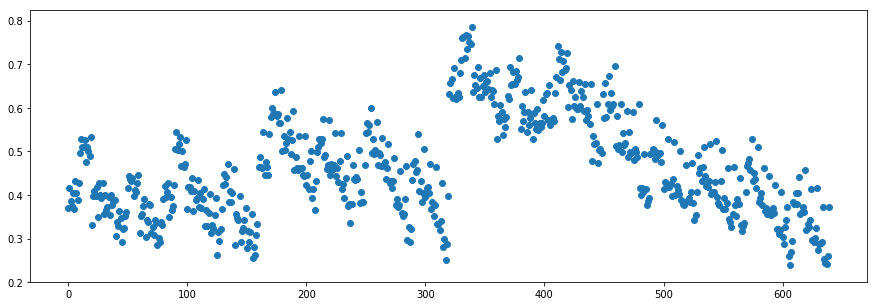

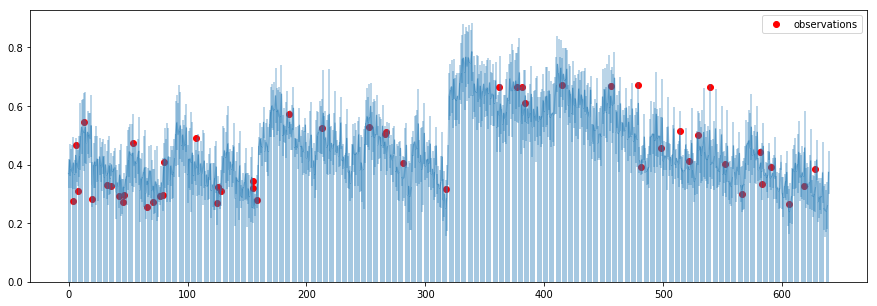

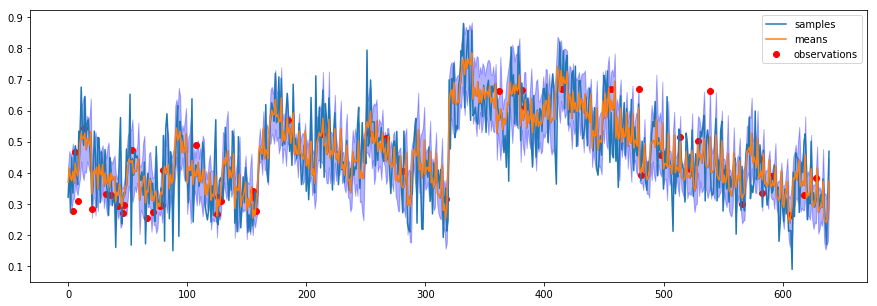

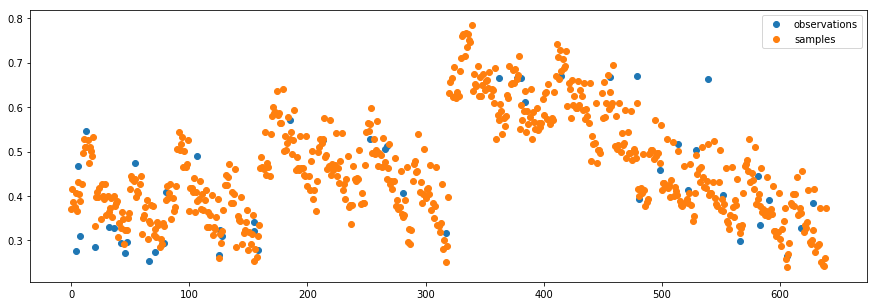

In [14]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 19)
new X is in there: True
new y is in there: True
mean probability is 0.3584905660377358
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 26)
new X is in there: True
new y is in there: True
mean probability is 0.48148148148148145
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 24)
new X is in there: True
new y is in there: True
mean probability is 0.43636363636363634
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 22)
new X is in there: True
new y is in there: True
mean probability is 0.39285714285714285
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 28)
new X is in there: True
new y is in there: True
mean probability is 0.49122807017543857
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 23)
new X is in there: True
new y is 

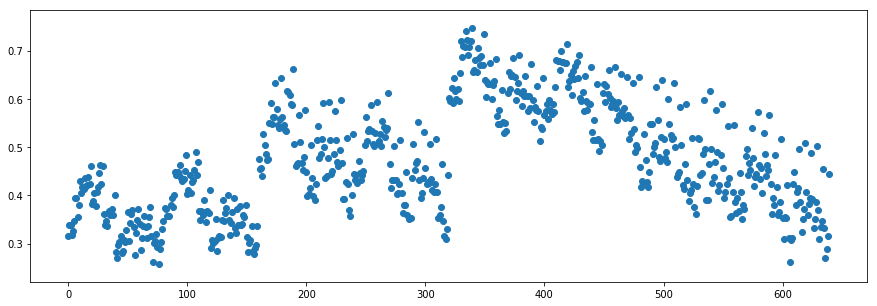

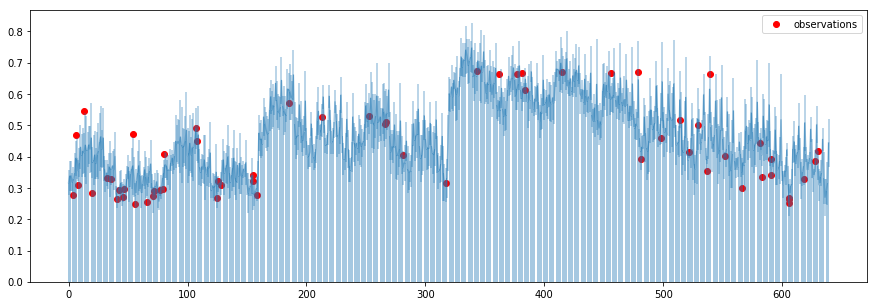

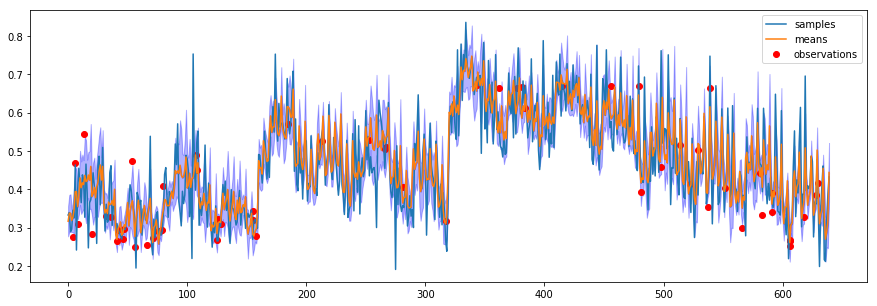

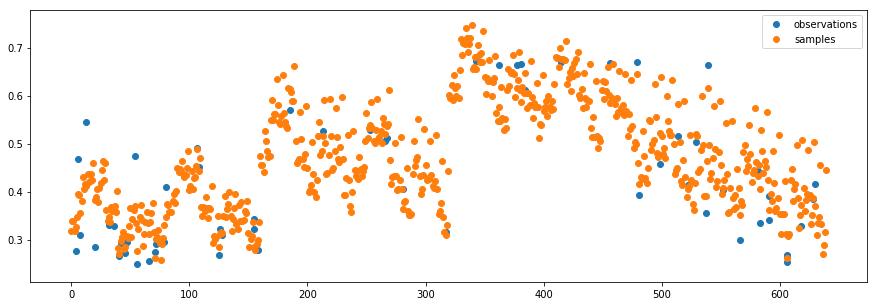

In [15]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 28)
new X is in there: True
new y is in there: True
mean probability is 0.4444444444444444
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 28)
new X is in there: True
new y is in there: True
mean probability is 0.4375
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 31)
new X is in there: True
new y is in there: True
mean probability is 0.47692307692307695
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 29)
new X is in there: True
new y is in there: True
mean probability is 0.4393939393939394
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 33)
new X is in there: True
new y is in there: True
mean probability is 0.4925373134328358
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 31)
new X is in there: True
new y is in there: True


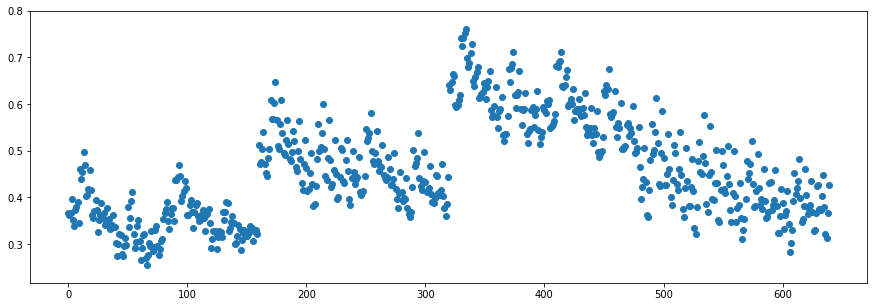

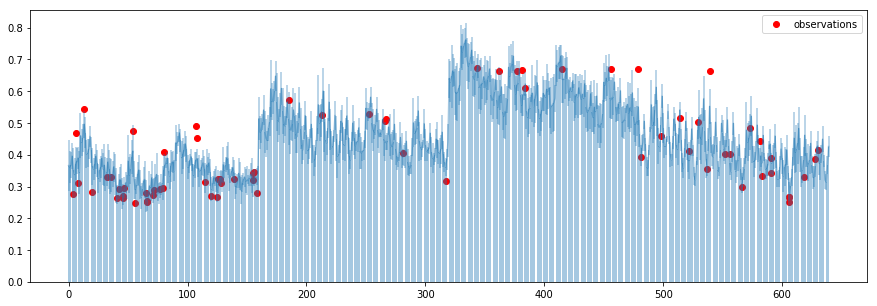

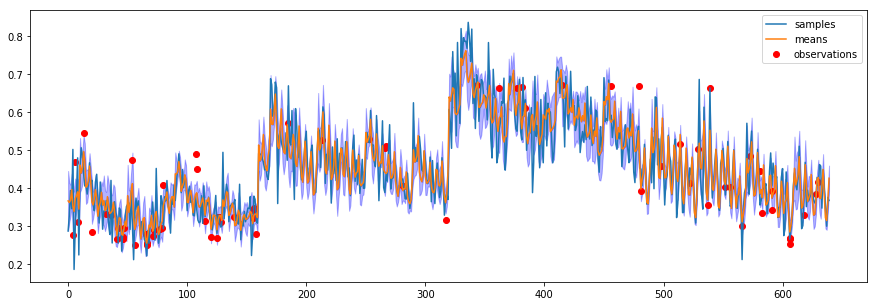

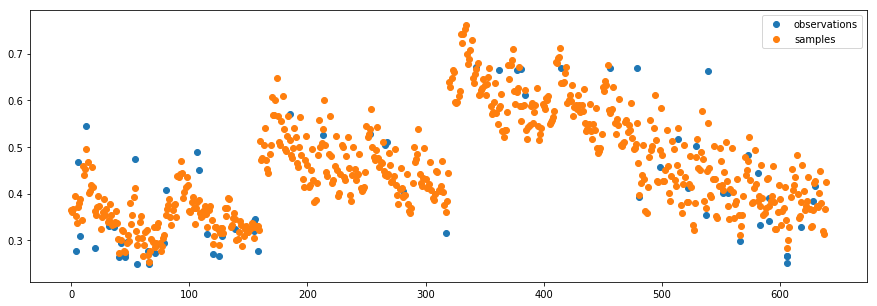

In [16]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 36)
new X is in there: True
new y is in there: True
mean probability is 0.4931506849315068
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3918918918918919
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 36)
new X is in there: True
new y is in there: True
mean probability is 0.48
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 31)
new X is in there: True
new y is in there: True
mean probability is 0.40789473684210525
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 34)
new X is in there: True
new y is in there: True
mean probability is 0.44155844155844154
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 28)
new X is in there: True
new y is in there: True
m

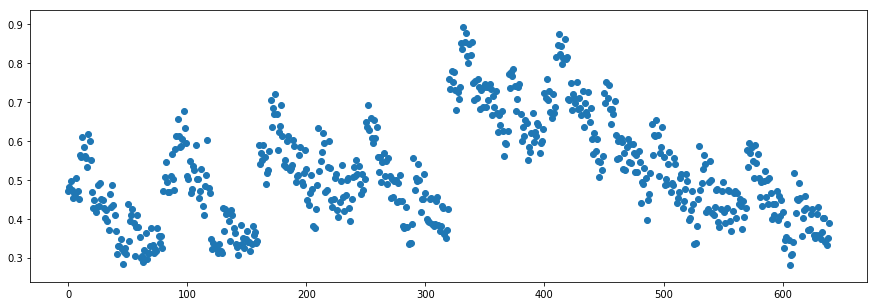

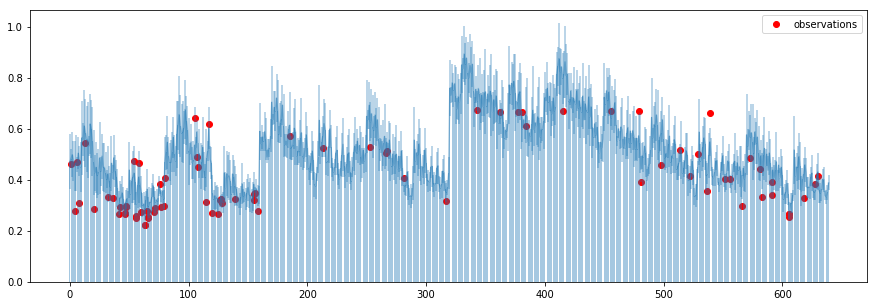

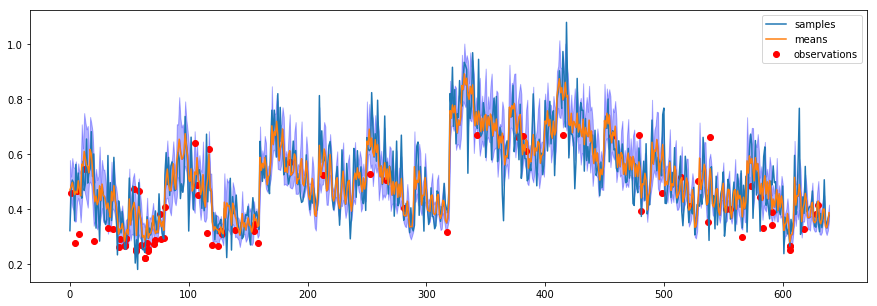

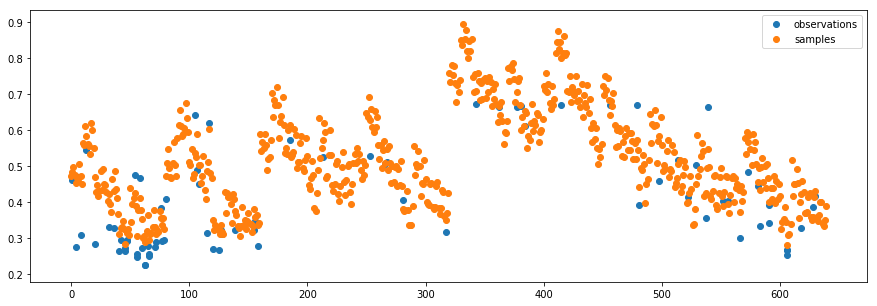

In [17]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 30)
new X is in there: True
new y is in there: True
mean probability is 0.3614457831325301
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 27)
new X is in there: True
new y is in there: True
mean probability is 0.32142857142857145
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3411764705882353
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 35)
new X is in there: True
new y is in there: True
mean probability is 0.4069767441860465
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 33)
new X is in there: True
new y is in there: True
mean probability is 0.3793103448275862
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 34)
new X is in there: True
new y is in 

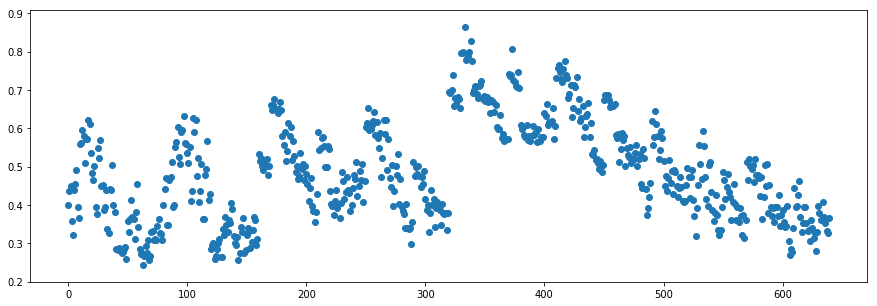

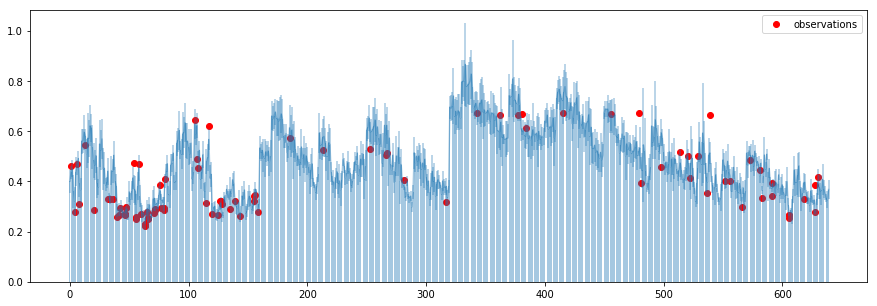

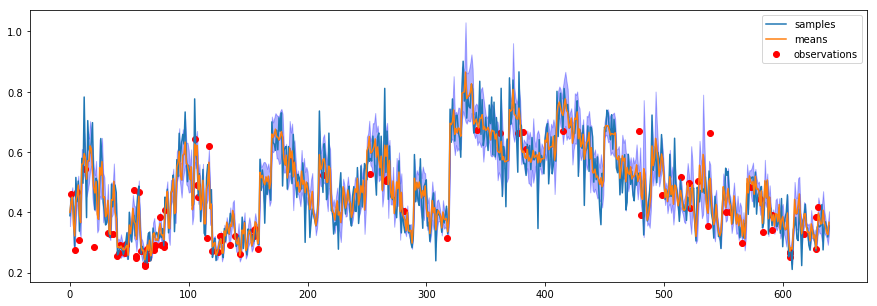

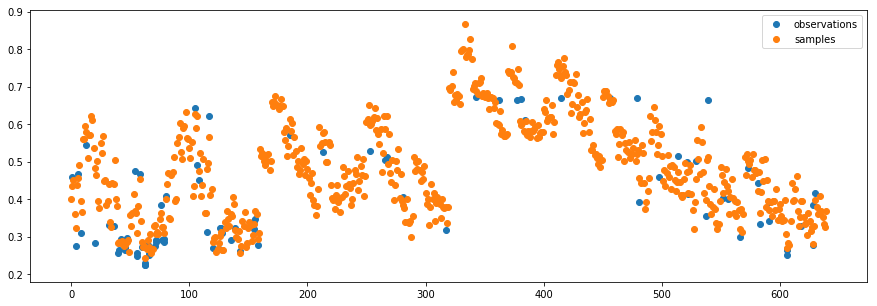

In [18]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 29)
new X is in there: True
new y is in there: True
mean probability is 0.3118279569892473
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 32)
new X is in there: True
new y is in there: True
mean probability is 0.3404255319148936
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 38)
new X is in there: True
new y is in there: True
mean probability is 0.4
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 34)
new X is in there: True
new y is in there: True
mean probability is 0.3541666666666667
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 35)
new X is in there: True
new y is in there: True
mean probability is 0.36082474226804123
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 37)
new X is in there: True
new y is in there: True
mea

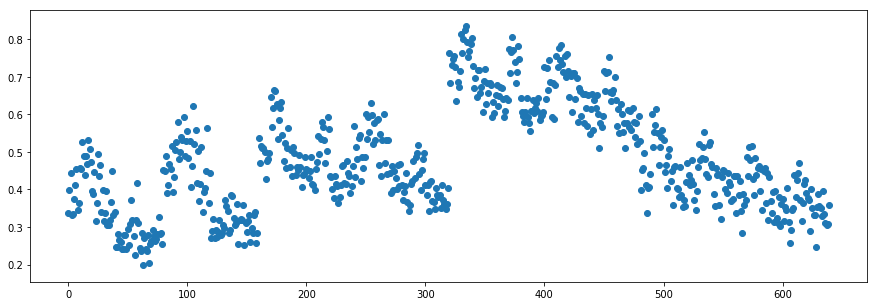

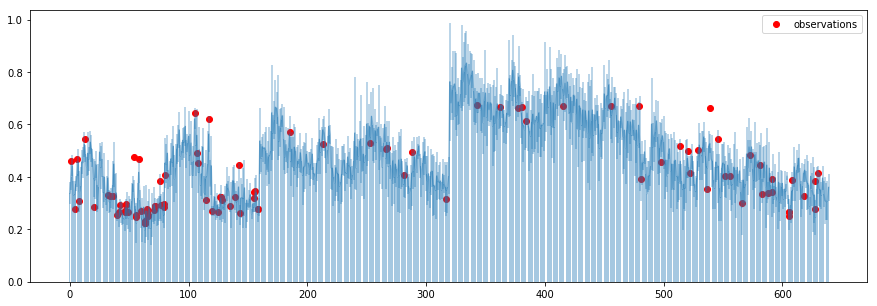

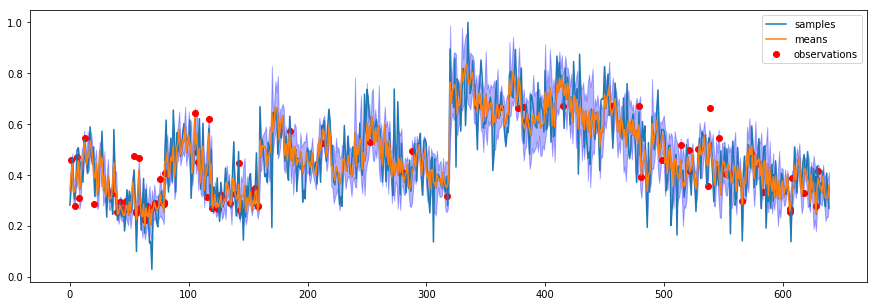

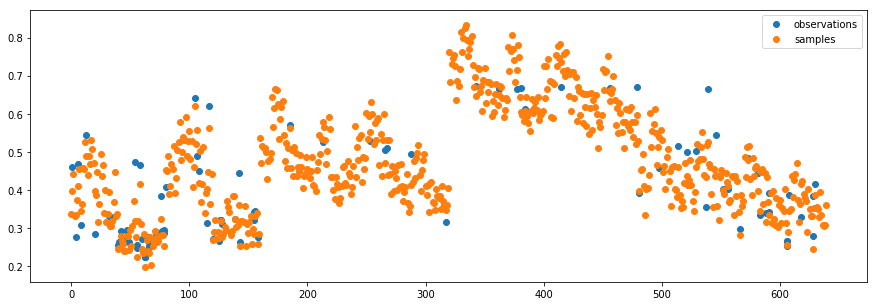

In [19]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 39)
new X is in there: True
new y is in there: True
mean probability is 0.3786407766990291
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 29)
new X is in there: True
new y is in there: True
mean probability is 0.27884615384615385
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 48)
new X is in there: True
new y is in there: True
mean probability is 0.45714285714285713
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 38)
new X is in there: True
new y is in there: True
mean probability is 0.3584905660377358
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 46)
new X is in there: True
new y is in there: True
mean probability is 0.42990654205607476
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 35)
new X is in there: True
new y is i

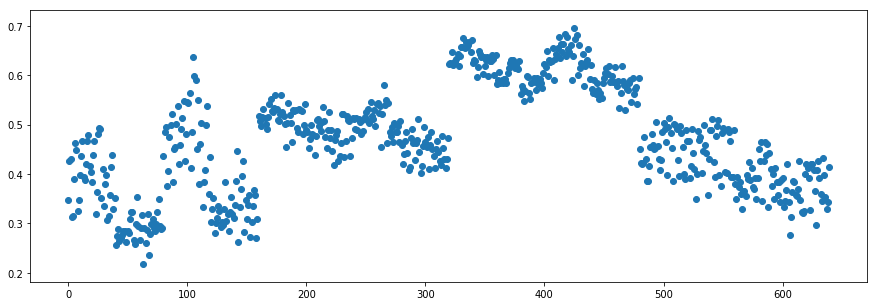

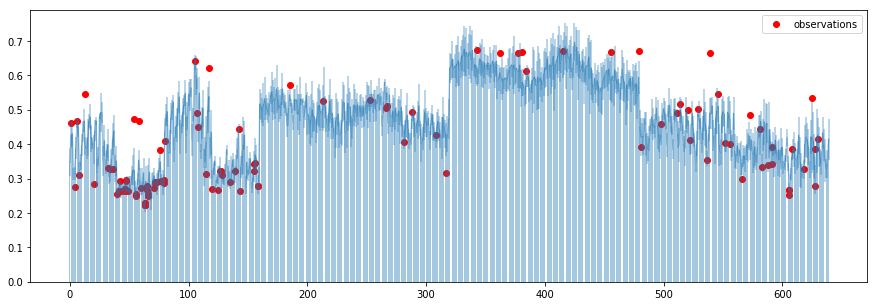

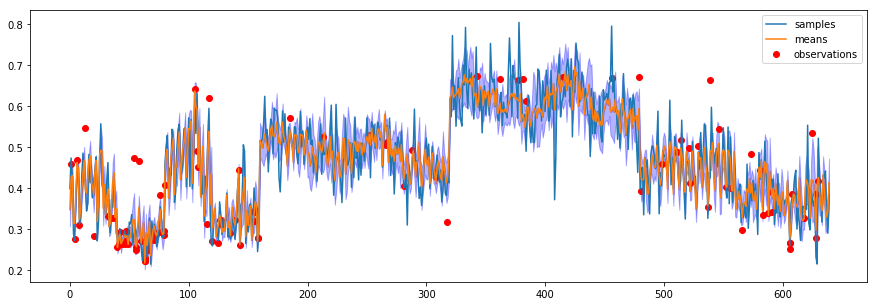

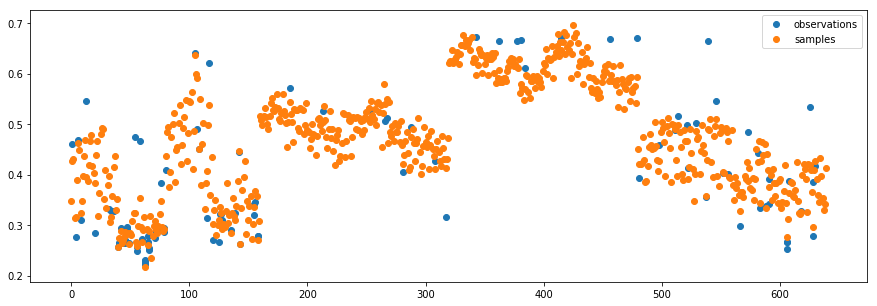

In [20]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 47)
new X is in there: True
new y is in there: True
mean probability is 0.415929203539823
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 46)
new X is in there: True
new y is in there: True
mean probability is 0.40350877192982454
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 45)
new X is in there: True
new y is in there: True
mean probability is 0.391304347826087
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 49)
new X is in there: True
new y is in there: True
mean probability is 0.4224137931034483
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 40)
new X is in there: True
new y is in there: True
mean probability is 0.3418803418803419
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 45)
new X is in there: True
new y is in th

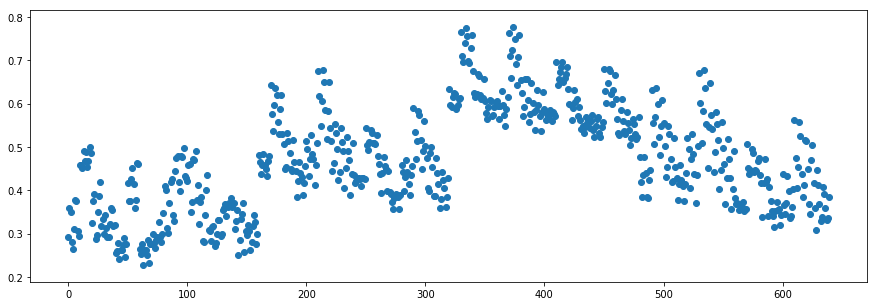

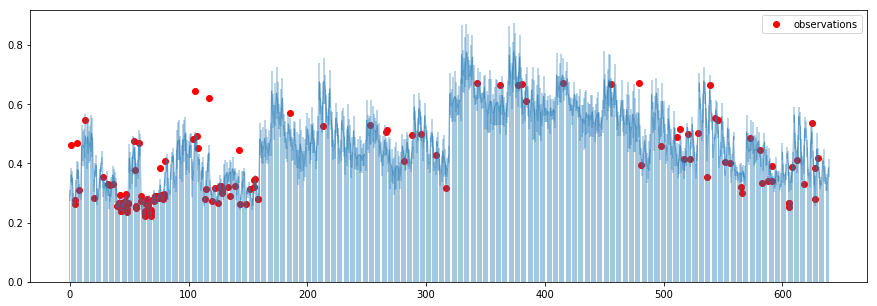

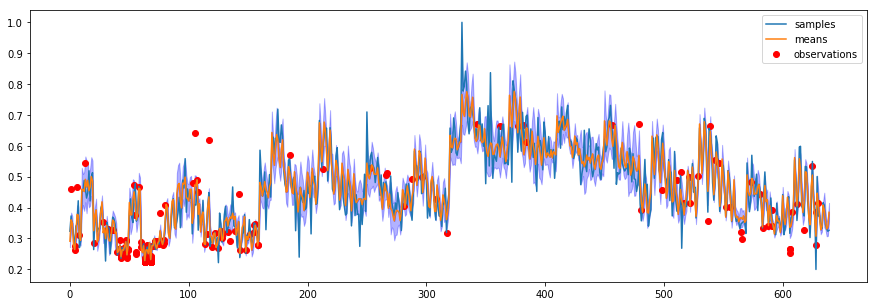

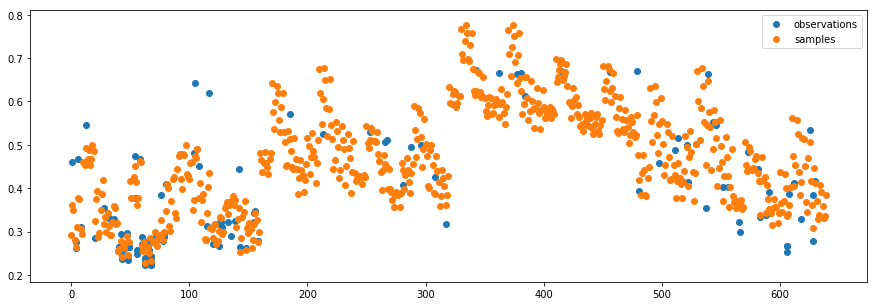

In [21]:
tg.goforit(100)
tg.plot_sample_grid()

In [22]:
tg.get_best_observation()

({'params': {'activations': [<function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>,
    <function tensorflow.python.ops.math_ops.tanh(x, name=None)>],
   'initialisation_scheme': <function tensorflow.python.keras.initializers.he_normal(seed=None)>,
   'l2': False,
   'num_neurons': [10, 5, 10],
   'optimizer': tensorflow.contrib.opt.python.training.nadam_optimizer.NadamOptimizer,
   'seed': 200},
  'score': 0.22349473366342132,
  'X': array([[0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [0],
         [0]], dtype=uint8)},
 {'params': {'activations': [<function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
    <function tensorflow.python.ops.math_ops.

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 60)
new X is in there: True
new y is in there: True
mean probability is 0.28169014084507044
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 63)
new X is in there: True
new y is in there: True
mean probability is 0.29439252336448596
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 66)
new X is in there: True
new y is in there: True
mean probability is 0.30697674418604654
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 66)
new X is in there: True
new y is in there: True
mean probability is 0.3055555555555556
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 67)
new X is in there: True
new y is in there: True
mean probability is 0.3087557603686636
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 74)
new X is in there: True
new y is i

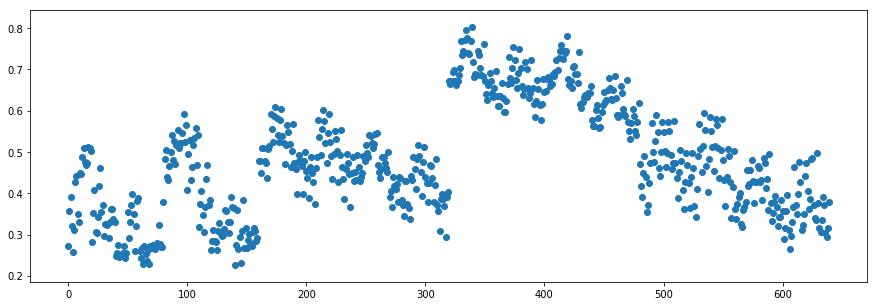

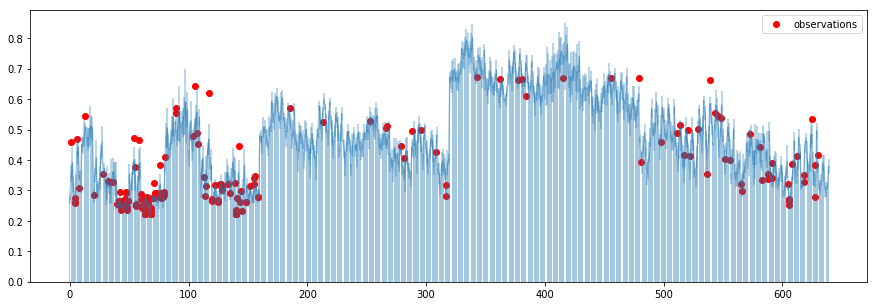

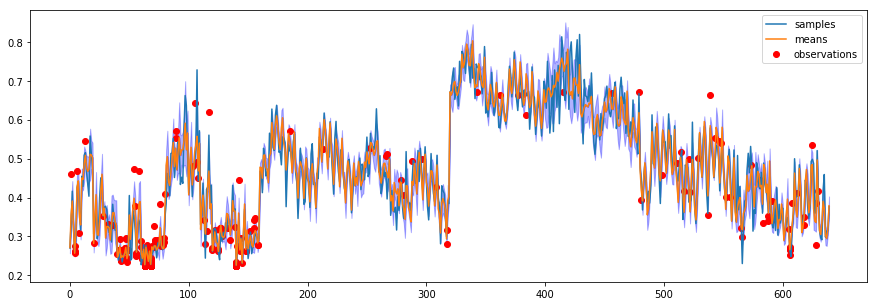

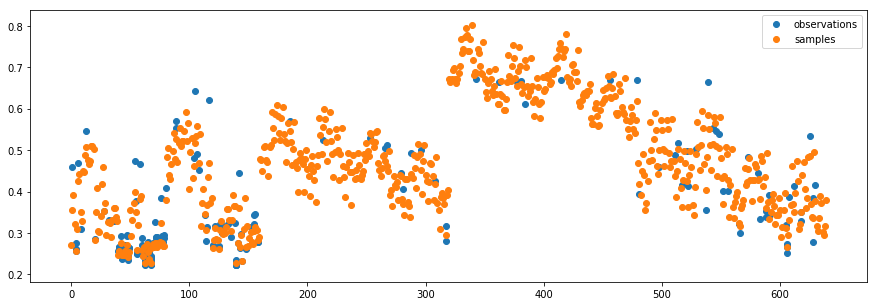

In [23]:
tg.goforit(10)
tg.plot_sample_grid()

initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 81)
new X is in there: True
new y is in there: True
mean probability is 0.25878594249201275
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 94)
new X is in there: True
new y is in there: True
mean probability is 0.29936305732484075
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 85)
new X is in there: True
new y is in there: True
mean probability is 0.2698412698412698
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 87)
new X is in there: True
new y is in there: True
mean probability is 0.27531645569620256
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 84)
new X is in there: True
new y is in there: True
mean probability is 0.26498422712933756
initialising Network <class 'base.EnsembleNetwork'>
length of the new dataset: (19, 91)
new X is in there: True
new y is 

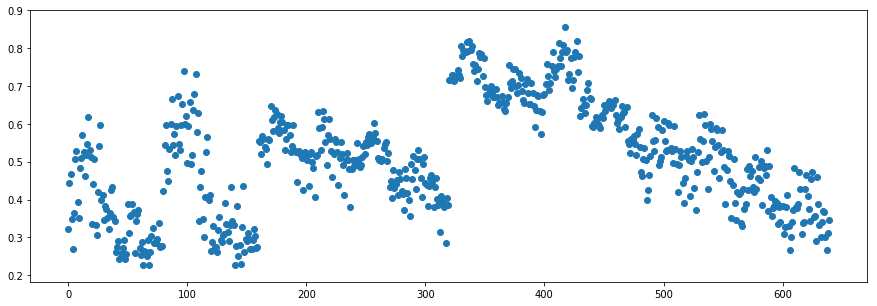

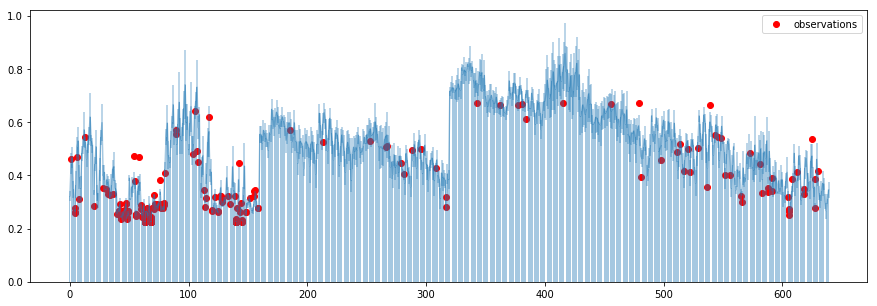

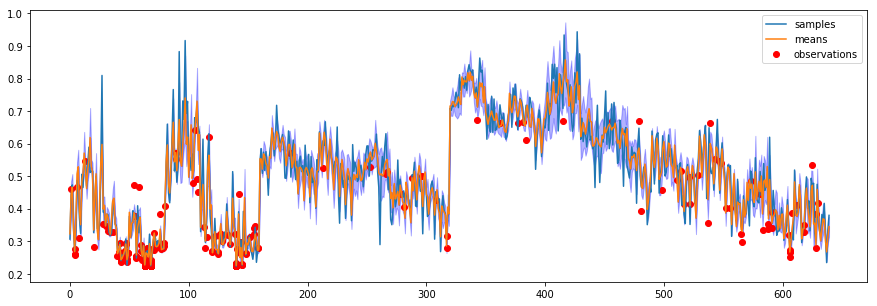

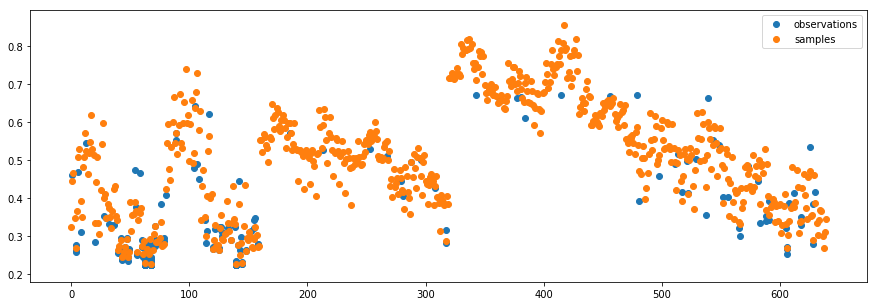

In [24]:
tg.goforit(10)
tg.plot_sample_grid()